In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

In [80]:
data = pd.read_csv("../../data/face-landmark/training.csv")
display(data.head())

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [81]:
# 결측치가 있는 row를 삭제
data = data.dropna()

# 이미지 데이터가 ndarray가 아니면 읽어서 ndarray로 처리합니다.
if not isinstance(data['Image'][0], np.ndarray):
    data['Image'] = data['Image'].apply(lambda row: np.fromstring(row, sep=' '))

# (2140, 31)
#   31 : 가로, 데이터 종류
# 2140 : 세로, 데이터 개수 (원래 7049 였는데 결측치 제거로 2140개만 남음)
print(f"data.shape : {data.shape}")

# 데이터 이미지 개수 2140개
print(f"Image data len : {len(data['Image'])}")

# 데이터 이미지의 shape은 9216=(=96*96)
print(f"Image data [0].shape : {data['Image'][0].shape}")

data.shape : (2140, 31)
Image data len : 2140
Image data [0].shape : (9216,)


In [82]:
# 이미지 데이터만 갖고 와서 쌓기
X_train = np.vstack(data['Image'].values)
# (2140, 9216) = 9216(96 * 96) 픽셀의 이미지가 2140개 있음
print(X_train.shape)

# 기존 이미지 픽셀 범위 0 ~ 255를 0 ~ 1 으로 정규화
X_train = X_train / 255.0

# 계산이 용이하도록 int로 표현되는 명암을 float 타입으로 변경
X_train = X_train.astype(np.float32)

# 이미지 개수 : 2140
print(f"image count : {len(data['Image'].values)}")

# (96, 96) 2차원 이미지로 만들기
X_train = X_train.reshape(-1, 96, 96, 1)

# (96 * 96) 픽셀의 이미지 2140개
print(X_train.shape)

(2140, 9216)
image count : 2140
(2140, 96, 96, 1)


In [83]:
# 맨 뒤에 있는 이미지 빼고 선택 -> Y
Y_train = data[data.columns[:-1]].values
print(f"y.shape : {Y_train.shape}")

# 원래 0 ~ 96 이던 좌표를 변환 함
# 이미지의 중앙점을 기준으로 -1 ~ 1 사이로 표현 되도록 처리
Y_train = (Y_train - 48) / 48

 # shuffle train data
X_train, Y_train = shuffle(X_train, Y_train, random_state=0)
Y_train = Y_train.astype(np.float32)

print(Y_train)

y.shape : (2140, 30)
[[ 0.34357226 -0.23578708 -0.27903485 ...  0.414966    0.08298607
   0.48534387]
 [ 0.42022967 -0.22094737 -0.4008804  ...  0.5402967  -0.06302392
   0.8482105 ]
 [ 0.3577143  -0.2673     -0.5224184  ...  0.6037143  -0.05271428
   0.8362857 ]
 ...
 [ 0.44972184 -0.27323046 -0.3730596  ...  0.4548477   0.02353642
   0.8040795 ]
 [ 0.43840352 -0.15370175 -0.4083684  ...  0.5440877  -0.03985965
   0.9047544 ]
 [ 0.35671037 -0.24173875 -0.353318   ...  0.5006386   0.09077578
   0.6003548 ]]


In [84]:
import torch

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()

        self.conv1 = torch.nn.Conv2d(1, 32, kernel_size=3, padding=0)
        self.relu = torch.nn.ReLU()
        self.maxpool2d = torch.nn.MaxPool2d(kernel_size=2)

        self.conv2 = torch.nn.Conv2d(32, 64, kernel_size=3, padding=0)
        self.conv3 = torch.nn.Conv2d(64, 128, kernel_size=3, padding=0)
        self.conv4 = torch.nn.Conv2d(128, 256, kernel_size=3, padding=0)
        self.conv5 = torch.nn.Conv2d(256, 512, kernel_size=3, padding=0)

        self.flatten = torch.nn.Flatten()

        self.fc1 = None
        self.fc2 = torch.nn.Linear(2048, 1024)
        self.fc3 = torch.nn.Linear(1024, 512)
        self.fc4 = torch.nn.Linear(512, 30)

        self.dropout = torch.nn.Dropout(0.1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool2d(x)

        x = self.conv2 (x)
        x = self.relu(x)
        x = self.maxpool2d(x)

        x = self.conv3(x)
        x = self.relu(x)
        x = self.maxpool2d(x)

        x = self.conv4(x)
        x = self.relu(x)
        x = self.maxpool2d(x)

        x = self.conv5(x)
        x = self.relu(x)
        x = self.maxpool2d(x)

        x =self.flatten(x)

        if self.fc1 is None:
            self.fc1 = torch.nn.Linear(x.shape[1], 2048)

        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc3(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc4(x)

        return x

model = Model()
print(model)

Model(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU()
  (maxpool2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc2): Linear(in_features=2048, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=30, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)


In [85]:
from torch.utils.data import DataLoader, TensorDataset

# 1. NumPy 배열을 PyTorch Tensor로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
# 2. 차원 순서 변경: (batch_size, height, width, channels) -> (batch_size, channels, height, width)
X_train = X_train.permute(0,  3, 2, 1 )

print(X_train.shape)

# TensorDataset을 사용해 X_train과 Y_train 묶음
train_dataset = TensorDataset(X_train, Y_train)

# DataLoader로 묶음(batch) 단위로 불러오기
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


torch.Size([2140, 1, 96, 96])


In [86]:
import torch.optim as optim

model.train()

# 손실 함수 및 옵티마이저 정의
loss_function = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# 학습 파라미터 설정
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(inputs)
        loss = loss_function(outputs, labels)

        # Optimizer 초기화
        optimizer.zero_grad()

        # 역전파
        loss.backward()

        # 파라미터 업데이트
        optimizer.step()

        # 배치 손실 누적
        running_loss += loss.item()

    # 에포크 후 손실 출력
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

Epoch [1/10], Loss: 0.0261
Epoch [2/10], Loss: 0.0054
Epoch [3/10], Loss: 0.0053
Epoch [4/10], Loss: 0.0051
Epoch [5/10], Loss: 0.0052
Epoch [6/10], Loss: 0.0049
Epoch [7/10], Loss: 0.0047
Epoch [8/10], Loss: 0.0046
Epoch [9/10], Loss: 0.0042
Epoch [10/10], Loss: 0.0037


torch.Size([1, 1, 96, 96])
(1, 30)


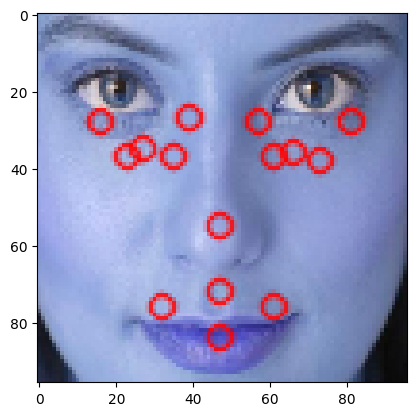

In [142]:
import cv2

imshowimg = cv2.imread("test2.png")
img_resized = cv2.resize(imshowimg, (96, 96))

img = cv2.imread("test2.png", cv2.IMREAD_GRAYSCALE)
img.resize((96, 96))
img = img / 255.0
img_tensor = torch.Tensor(img)
img_tensor = img_tensor.reshape((1, 1, 96, 96))
print(img_tensor.shape)

with torch.no_grad():
    predict = model(img_tensor)
    keypoints = predict.numpy()
    keypoints = keypoints * 48 + 48
    print(keypoints.shape)
    for i in range(15):
        x, y = keypoints[0, i * 2], keypoints[0, i * 2 + 1]
        cv2.circle(img_resized, (int(x), int(y) ), 3, (255, 0, 0), 1, cv2.LINE_AA )

plt.imshow(img_resized)